In [ ]:
# In this project we have separate csv for train and test dataset
# So we perform all operations on train dataset first , and then to test data set.
# and we apply linear regression

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [163]:
# Reading the dataset
train = pd.read_csv(r'C:\Users\ensar\Downloads\bigmart_train.csv', delimiter = ',')

In [164]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [165]:
train.shape

(8523, 12)

In [166]:
# Checking whether null values are present
train.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [167]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [168]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [169]:
train['Outlet_Size'].mode()[0]

'Medium'

In [170]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [171]:
train.groupby(['Outlet_Identifier','Outlet_Size']).nunique('Outlet_Size')

## Out of 10 Unique Outlets, only for 7 Outlet size ia available'
## Need to find the outlet_size for OUT010, OUT017, OUT045


,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,,,,,,,,,,
OUT013,High,932,318,5,863,16,895,1,1,1,788
OUT018,Medium,928,328,5,848,16,892,1,1,1,779
OUT019,Small,528,0,5,496,16,522,1,1,1,368
OUT027,Medium,935,0,5,867,16,897,1,1,1,827
OUT035,Small,930,321,5,856,16,895,1,1,1,806
OUT046,Small,930,331,5,857,16,905,1,1,1,778
OUT049,Medium,930,318,5,860,16,896,1,1,1,785


In [172]:
#train[train['Outlet_Size'] == np.nan].head()
print(train[train['Outlet_Identifier']=='OUT010']['Outlet_Size'].size)
train[train['Outlet_Identifier']=='OUT010']['Outlet_Size'].isna().sum()

555


555

In [173]:
train[train['Outlet_Identifier']=='OUT010'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [174]:
print(train[train['Outlet_Identifier']=='OUT017']['Outlet_Size'].size)
train[train['Outlet_Identifier']=='OUT017']['Outlet_Size'].isna().sum()

926


926

In [175]:
train[train['Outlet_Identifier']=='OUT017'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.535
25,NCD06,13.0,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.908


In [176]:
print(train[train['Outlet_Identifier']=='OUT045']['Outlet_Size'].size)
train[train['Outlet_Identifier']=='OUT045']['Outlet_Size'].isna().sum()

929


929

In [177]:
train[train['Outlet_Identifier']=='OUT045'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028


In [178]:
train.groupby(['Outlet_Size','Outlet_Location_Type','Outlet_Type']).nunique()

Item_Identifier  \
Outlet_Size Outlet_Location_Type Outlet_Type                          
High        Tier 3               Supermarket Type1              932   
Medium      Tier 1               Supermarket Type1              930   
            Tier 3               Supermarket Type2              928   
                                 Supermarket Type3              935   
Small       Tier 1               Grocery Store                  528   
                                 Supermarket Type1              930   
            Tier 2               Supermarket Type1              930   

                                                    Item_Weight  \
Outlet_Size Outlet_Location_Type Outlet_Type                      
High        Tier 3               Supermarket Type1          318   
Medium      Tier 1               Supermarket Type1          318   
            Tier 3               Supermarket Type2          328   
                                 Supermarket Type3            0   
Small       Tier 1               Grocery Store                0   
                                 Supermarket Type1          331   
            Tier 2               Supermarket Type1          321   

                                                    Item_Fat_Content  \
Outlet_Size Outlet_Location_Type Outlet_Type                           
High        Tier 3               Supermarket Type1                 5   
Medium      Tier 1               Supermarket Type1                 5   
            Tier 3               Supermarket Type2                 5   
                                 Supermarket Type3                 5   
Small       Tier 1               Grocery Store                     5   
                                 Supermarket Type1                 5   
            Tier 2               Supermarket Type1                 5   

                                                    Item_Visibility  \
Outlet_Size Outlet_Location_Type Outlet_Type                          
High        Tier 3               Supermarket Type1              863   
Medium      Tier 1               Supermarket Type1              860   
            Tier 3               Supermarket Type2              848   
                                 Supermarket Type3              867   
Small       Tier 1               Grocery Store                  496   
                                 Supermarket Type1              857   
            Tier 2               Supermarket Type1              856   

                                                    Item_Type  Item_MRP  \
Outlet_Size Outlet_Location_Type Outlet_Type                              
High        Tier 3               Supermarket Type1         16       895   
Medium      Tier 1               Supermarket Type1         16       896   
            Tier 3               Supermarket Type2         16       892   
                                 Supermarket Type3         16       897   
Small       Tier 1               Grocery Store             16       522   
                                 Supermarket Type1         16       905   
            Tier 2               Supermarket Type1         16       895   

                                                    Outlet_Identifier  \
Outlet_Size Outlet_Location_Type Outlet_Type                            
High        Tier 3               Supermarket Type1                  1   
Medium      Tier 1               Supermarket Type1                  1   
            Tier 3               Supermarket Type2                  1   
                                 Supermarket Type3                  1   
Small       Tier 1               Grocery Store                      1   
                                 Supermarket Type1                  1   
            Tier 2               Supermarket Type1                  1   

                                                    Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type Outlet_Type                                    
High        Tier 3     

# with the above values we can able to fill size for OUT010, OUT017, OUT045 and it will be 'Small'
!--
    Outlet_Size	Outlet_Location_Type	Outlet_Type	
        High		Tier 3			Supermarket Type1
        Medium		Tier 1			Supermarket Type1
                    Tier 3			Supermarket Type2
                                    Supermarket Type3
        Small		Tier 1			Grocery Store	
                                    Supermarket Type1
                    Tier 2			Supermarket Type1
--!

OUT010	Small	Tier 1                Grocery Store 
OUT017	Small	Tier 2                Supermarket Type1
OUT045	Small	Tier 2                Supermarket Type1

In [179]:
# Filling Nans in Outlet_Size with the identified value above
train['Outlet_Size']=train['Outlet_Size'].fillna('Small')

In [180]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [181]:
train.groupby(['Item_Type'])['Item_Weight'].mean('Item_Weight')

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [182]:
train.groupby(['Item_Type'])['Item_Weight'].mean('Item_Weight')
train[train['Item_Type']=='Frozen Foods']['Item_Weight'].mean()

12.867061281337076

In [183]:
print(train[train['Item_Type']=='Baking Goods']['Item_Weight'].size)
train[train['Item_Type']=='Baking Goods']['Item_Weight'].isna().sum()

648


112

In [184]:
print(train[train['Item_Type']=='Breads']['Item_Weight'].size)
train[train['Item_Type']=='Breads']['Item_Weight'].isna().sum()

# Insight -- With the above, most of the Item types have null values

251


47

In [185]:
#Filling Nans in Item_Weight by mean value of the particular Item_Type

train['Item_Weight'] = train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [186]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [187]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

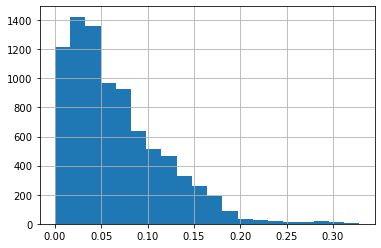

In [188]:
train['Item_Visibility'].hist(bins=20)

In [189]:
#Treating Outliers in Item_Visibility Column
q1 = train['Item_Visibility'].quantile(0.25)
q2 = train['Item_Visibility'].quantile(0.50)
q3 = train['Item_Visibility'].quantile(0.75)
iqr = q3 - q1
min_val = q1 - 1.5 * iqr
max_val = q3 + 1.5 * iqr
# train['Item_Visibility'] = np.where(train['Item_Visibility']  > max_val, q2, train['Item_Visibility'] )
# train['Item_Visibility'] = np.where(train['Item_Visibility']  < min_val, q2, train['Item_Visibility'] )   

In [190]:
print('q1=',q1,'q2=',q2,'q3=',q3)
print(min_val,max_val,iqr)
train['Item_Visibility'].value_counts()

q1= 0.0269894775 q2= 0.053930934 q3= 0.0945852925
-0.07440424500000001 0.195979015 0.067595815


0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [191]:
train['Item_Visibility'] = np.where(train['Item_Visibility']  > max_val, q2, train['Item_Visibility'] )
train['Item_Visibility'] = np.where(train['Item_Visibility']  < min_val, q2, train['Item_Visibility'] ) 

In [192]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [193]:
# Treating Typos of Item_Fat_Content
train['Item_Fat_Content'] =  train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
train['Item_Fat_Content'] =  train['Item_Fat_Content'].replace(['reg'],'Regular')

In [194]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [195]:
le = LabelEncoder()
#Transforming the categorical values

In [196]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [197]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [198]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [199]:
#Creating dummies for Outlet_Types
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [200]:
train = pd.concat([train,dummy],axis=1)

In [201]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,0,1,0,0


In [202]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [203]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [204]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,732.3800,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,1,0,0


In [205]:
x = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [206]:
test = pd.read_csv(r'C:\Users\ensar\Downloads\bigmart_test.csv', delimiter = ',')

In [207]:
test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [208]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Small')

In [209]:
# Filling Nans in Item_Weight by mean value of the particular Item_Type

test['Item_Weight'] = test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [210]:
# Treating Outliers in Item_Visibility Column
q1 = test['Item_Visibility'].quantile(0.25)
q2 = test['Item_Visibility'].quantile(0.50)
q3 = test['Item_Visibility'].quantile(0.75)
iqr = q3 - q1
min_val = q1 - 1.5 * iqr
max_val = q3 + 1.5 * iqr
test['Item_Visibility'] = np.where(test['Item_Visibility']  > max_val, q2, test['Item_Visibility'] )
test['Item_Visibility'] = np.where(test['Item_Visibility']  < min_val, q2, test['Item_Visibility'] ) 

In [211]:
# Treating Typos of Item_Fat_Content
test['Item_Fat_Content'] =  test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
test['Item_Fat_Content'] =  test['Item_Fat_Content'].replace(['reg'],'Regular')

In [212]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])
# Creating dummies for Outlet_Types
dmy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test,dmy],axis=1)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.75000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,0,1,0,0
1,FDW14,8.30000,1,0.038428,Dairy,87.3198,OUT017,2007,2,1,Supermarket Type1,0,1,0,0
2,NCN55,14.60000,0,0.099575,Others,241.7538,OUT010,1998,2,2,Grocery Store,1,0,0,0
3,FDQ58,7.31500,0,0.015388,Snack Foods,155.0340,OUT017,2007,2,1,Supermarket Type1,0,1,0,0
4,FDY38,12.95504,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,0,0,0,1


In [213]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [214]:
xt = test.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [215]:
x.columns, xt.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [216]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [129]:
##  Applying Liner Regression ##
##-----------------------------
lin = LinearRegression()

In [130]:
lin.fit(xtrain,ytrain)
print(lin.coef_)
lin.intercept_

[   -1.74371719    72.89351752  -527.93225234    15.78699055
   -32.76493765    -6.67974018 -1733.51422993   230.47810182
   -97.03312246  1600.06925057]


-51.467844208611496

In [131]:
predictions = lin.predict(xtest)

In [228]:
print("RMSE:",np.sqrt(mean_squared_error(ytest,predictions)))
print('R2 sqr:',r2_score(ytest, predictions))
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(predictions.shape)

RMSE: 1099.417446811289
R2 sqr: 0.5684678630829685
(5966, 10)
(5966,)
(2557, 10)
(2557,)
(2557,)


In [229]:
## Applying KNN for Regression ##
##----------------------------------
from sklearn import neighbors 

In [230]:
knnR = neighbors.KNeighborsRegressor(n_neighbors = 10)

In [231]:
knnR.fit(xtrain, ytrain)  #fit the model

KNeighborsRegressor(n_neighbors=10)

In [232]:
 pred=knnR.predict(xtest) #make prediction on test set

In [233]:
from math import sqrt
error = sqrt(mean_squared_error(ytest,pred)) #calculate rmse   
print('RMSE:',error)
print('R2 sqr:',r2_score(ytest, pred))

RMSE: 1274.3572381639037
R2 sqr: 0.42021059506319336


In [223]:
## Applying Ridge for Regression ##
##----------------------------------
from sklearn.linear_model import Ridge

In [224]:
ridge = Ridge(alpha=1.0)

In [225]:
ridge.fit(xtrain, ytrain)  #fit the model

Ridge()

In [226]:
pred_train=ridge.predict(xtrain) #make prediction on train set
pred_test=ridge.predict(xtest) #make prediction on test set

In [227]:
error = sqrt(mean_squared_error(ytrain,pred_train)) #calculate rmse   
print('RMSE:',error)
print('R2 sqr:',r2_score(ytrain, pred_train))

error = sqrt(mean_squared_error(ytest,pred_test)) #calculate rmse   
print('RMSE:',error)
print('R2 sqr:',r2_score(ytest, pred_test))

RMSE: 1141.8629436064937
R2 sqr: 0.559127708147825
RMSE: 1099.3810863241813
R2 sqr: 0.5684964063069835


In [153]:
## Applying Lasso for Regression ##
##----------------------------------
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

lasso.fit(xtrain, ytrain) 
pred_train= lasso.predict(xtrain)
print('RMSE:',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('R2 sqr:',r2_score(ytrain, pred_train))

pred_test= lasso.predict(xtest)
print('RMSE:',np.sqrt(mean_squared_error(ytest,pred_test))) 
print('R2 sqr:',r2_score(ytest, pred_test))

RMSE: 1142.0857536204346
R2 sqr: 0.5589556378554053
RMSE: 1098.8949285303775
R2 sqr: 0.5688779527143972


In [222]:
## Applying Elasticnet for Regression ##
##----------------------------------
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.01)
enet.fit(xtrain, ytrain) 

pred_train= enet.predict(xtrain)
print('RMSE:',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('R2 SQR:',r2_score(ytrain, pred_train))

pred_test= enet.predict(xtest)
print('RMSE:',np.sqrt(mean_squared_error(ytest,pred_test)))
print('R2 SQR:', r2_score(ytest, pred_test))

RMSE: 1142.5186032971885
R2 SQR: 0.5586212635134015
RMSE: 1099.9511581156878
R2 SQR: 0.5680487875386936


In [ ]:
# Insights 
#---------
# Linear -> 	R2 sqr: 0.5684678630829685
# KNN Reg -> 	R2 sqr: 0.42021059506319336
# Ridge -> 	R2 sqr: 0.5684964063069835
# Lasso -> 	R2 sqr: 0.5688779527143972
# Elastic Net -> 	R2 SQR: 0.5680487875386936